In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
mob_t = pd.read_csv('C:/Users/lenovo/Desktop/datasets/mobiledata/mobile_train.csv')
mob_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mob_t.shape

(2000, 21)

In [5]:
mob_t.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
mob_t.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [7]:
# find number of mobile who are dule_sim=1 and not dule_sim=0
dule_sim_count=mob_t['dual_sim'].value_counts()
dule_sim_count

1    1019
0     981
Name: dual_sim, dtype: int64

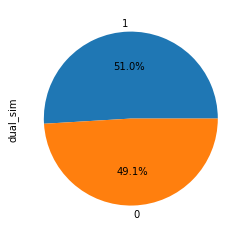

In [8]:
# pie chart 
dule_sim_count.plot.pie(autopct="%.1f%%")

Text(0.5, 1.0, 'Histogram')

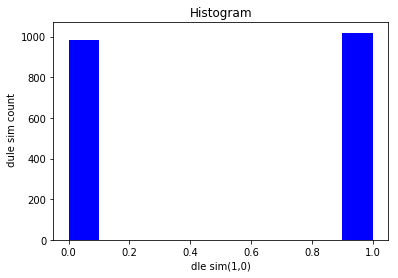

In [15]:
#Graphically representation of survived passenger 
plt.hist(mob_t['dual_sim'],10,density = False, facecolor = 'blue')
plt.xlabel('dle sim(1,0)')
plt.ylabel(' dule sim count')
plt.title('Histogram')

In [9]:
mob_t.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
mob_t.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


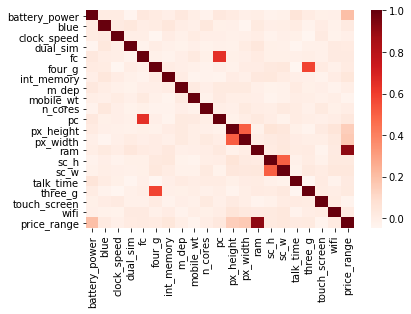

In [52]:
corrmatrix=mob_t.corr()
sns.heatmap(corrmatrix,annot=False,cmap='Reds')
plt.show()

In [12]:
# how many  price range
price_range_count=mob_t['price_range'].value_counts()
price_range_count

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

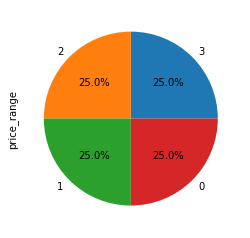

In [13]:
# pie chart 
price_range_count.plot.pie(autopct="%.1f%%")

Text(0.5, 1.0, 'Histogram')

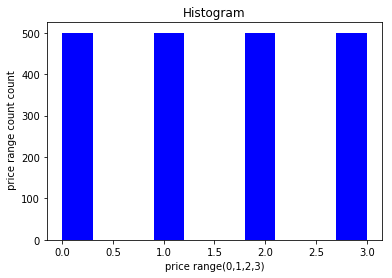

In [17]:
#Graphically representation of survived passenger 
plt.hist(mob_t['price_range'],10,density = False, facecolor = 'blue')
plt.xlabel('price range(0,1,2,3)')
plt.ylabel(' price range count count')
plt.title('Histogram')

In [20]:
mob_t['four_g'].head()

0    0
1    1
2    1
3    0
4    1
Name: four_g, dtype: int64

In [71]:
# fourg range count
fourg_range_count=mob_t['four_g'].value_counts()
fourg_range_count

1    1043
0     957
Name: four_g, dtype: int64

In [72]:
# fourg range count
threeg_range_count=mob_t['three_g'].value_counts()
threeg_range_count

1    1523
0     477
Name: three_g, dtype: int64

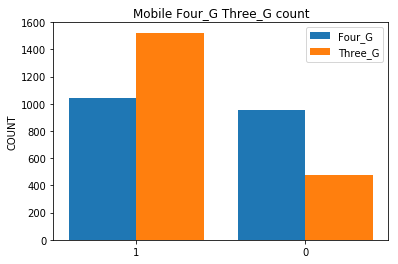

In [78]:
X = ['1','0']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2,fourg_range_count, 0.4, label = 'Four_G')
plt.bar(X_axis + 0.2, threeg_range_count, 0.4, label = 'Three_G')
  
plt.xticks(X_axis, X)
#plt.xlabel("F")
plt.ylabel("COUNT")
plt.title("Mobile Four_G Three_G count")
plt.legend()
plt.show()

 percentage of mobile four_g and three_g both=1 68.48325673013788


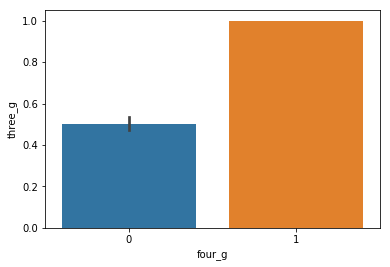

In [47]:
sns.barplot(x='four_g',y='three_g',data=mob_t)
print(" percentage of mobile four_g and three_g both=1",mob_t['four_g'][mob_t['three_g']==1].value_counts(normalize=True)[1]*100)
#print(" percentage of mobile four_g and three_g both=0",mob_t['four_g'][mob_t['three_g']==0].value_counts(normalize=True)[1]*100)

In [53]:
zero_count=(mob_t['four_g'][mob_t['three_g']==0])
print(zero_count.value_counts())

0    477
Name: four_g, dtype: int64


 percentage of mobile four_g and three_g both=1 68.48325673013788


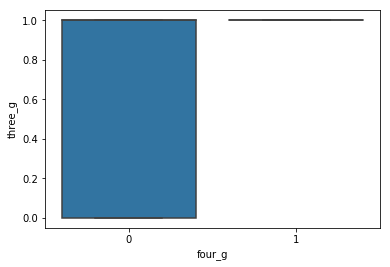

In [54]:
sns.boxplot(x='four_g',y='three_g',data=mob_t)
print(" percentage of mobile four_g and three_g both=1",mob_t['four_g'][mob_t['three_g']==1].value_counts(normalize=True)[1]*100)

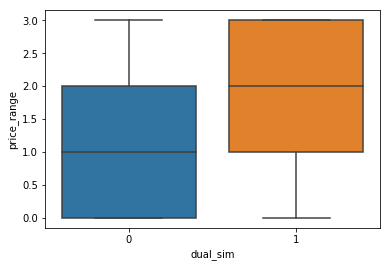

In [56]:
sns.boxplot(x='dual_sim',y='price_range',data=mob_t)
plt.show()

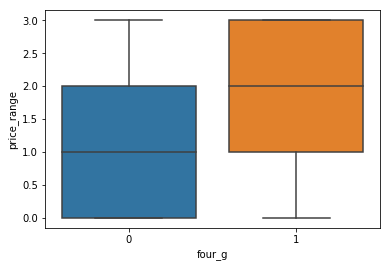

In [66]:
sns.boxplot(x='four_g',y='price_range',data=mob_t)
plt.show()

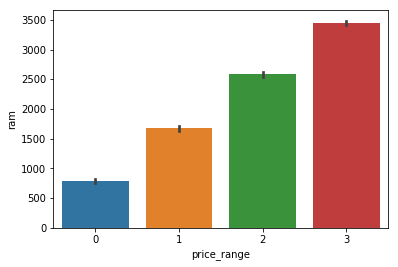

In [63]:
sns.barplot(x='price_range',y='ram',data=mob_t)
plt.show()

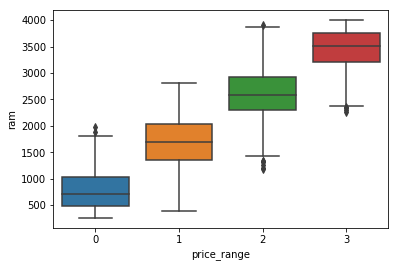

In [62]:
sns.boxplot(x='price_range',y='ram',data=mob_t)
plt.show()

In [6]:
scaler=StandardScaler()
x=mob_t.drop('price_range',axis=1)
y=mob_t['price_range']


scaler.fit(x)
x_transformed=scaler.transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.3)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [7]:
#SVM
model=SVC()
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

print("Train set Accuracy"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test set Accuracy"+str(accuracy_score(y_test_pred,y_test)*100))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train set Accuracy99.07142857142858
Test set Accuracy88.66666666666667


In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_pred,y_test)

array([[140,   7,   0,   0],
       [  9, 131,  14,   0],
       [  0,  13, 117,  18],
       [  0,   0,   7, 144]], dtype=int64)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       147
           1       0.87      0.85      0.86       154
           2       0.85      0.79      0.82       148
           3       0.89      0.95      0.92       151

   micro avg       0.89      0.89      0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600

